# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

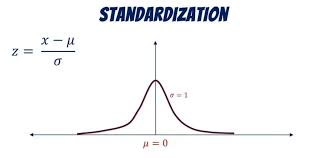


In [20]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io

# Upload the dataset
print("Please upload your dataset 'API_SSF_DS2_en_csv_v2_14635.csv'")
uploaded = files.upload()

# Load the dataset with proper error handling for World Bank format
filename = list(uploaded.keys())[0]

# Try loading with skiprows=4 which is common for World Bank datasets
try:
    df = pd.read_csv(filename, skiprows=4)
    print("Successfully loaded dataset by skipping first 4 rows")
except:
    # If that fails, try loading normally
    df = pd.read_csv(filename)
    print("Loaded dataset without skipping rows")

print("Dataset shape:", df.shape)
print("\nDataset info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Display missing values and data types
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

# Data Preprocessing - Handling missing values and non-numeric data
print("\n" + "="*60)
print("ENHANCED DATA HANDLING AND PREPROCESSING")
print("="*60)

print("Original dataset shape:", df.shape)

# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print(f"\nNon-numeric columns: {list(non_numeric_cols)}")

# Enhanced Data Handling - Comprehensive analysis
print("\n" + "="*40)
print("COMPREHENSIVE NON-NUMERIC DATA ANALYSIS")
print("="*40)

# Detailed analysis of non-numeric columns
if len(non_numeric_cols) > 0:
    for i, col in enumerate(non_numeric_cols[:3]):  # Analyze first 3 non-numeric columns
        print(f"\n📊 Non-numeric column {i+1}: '{col}'")
        print(f"   Unique values: {df[col].nunique()}")
        print(f"   Missing values: {df[col].isnull().sum()}")
        print(f"   Sample values: {df[col].dropna().unique()[:5]}")

        # Demonstrate one-hot encoding capability
        if df[col].nunique() <= 10:  # Only encode if reasonable number of categories
            categorical_encoded = pd.get_dummies(df[col], prefix=col, prefix_sep='_')
            print(f"   One-hot encoded: {categorical_encoded.shape[1]} new columns")
            print(f"   Encoded columns sample: {list(categorical_encoded.columns[:3])}")
else:
    print("No non-numeric columns found in the dataset")

# Handle missing values - fill with mean for numeric columns
print("\n" + "="*40)
print("MISSING VALUES HANDLING")
print("="*40)

numeric_cols = df.select_dtypes(include=[np.number]).columns
df_clean = df.copy()

# Track missing value statistics
missing_before = df[numeric_cols].isnull().sum().sum()
print(f"Missing values in numeric columns before handling: {missing_before}")

# Fill numeric missing values with column mean
cols_with_missing = []
for col in numeric_cols:
    if df_clean[col].isnull().sum() > 0:
        cols_with_missing.append(col)
        df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

print(f"Columns with missing values handled: {len(cols_with_missing)}")
if cols_with_missing:
    print(f"Sample columns: {cols_with_missing[:5]}")

missing_after = df_clean.isnull().sum().sum()
print(f"\nMissing values after handling: {missing_after}")
print(f"Reduction in missing values: {missing_before - missing_after}")

# Enhanced non-numeric column handling
print("\n" + "="*40)
print("NON-NUMERIC COLUMNS FINAL HANDLING")
print("="*40)

# For PCA, we'll focus on numeric columns but demonstrate preservation of non-numeric info
if len(non_numeric_cols) > 0:
    # Preserve non-numeric columns for potential analysis
    non_numeric_data = df_clean[non_numeric_cols].copy()
    print(f"Preserved {len(non_numeric_cols)} non-numeric columns for reference:")
    for col in non_numeric_cols[:3]:
        print(f"  - {col}: {non_numeric_data[col].nunique()} unique values")

# Select only numeric columns for PCA (excluding any identifier columns)
pca_columns = [col for col in numeric_cols if df_clean[col].nunique() > 1]  # Remove constant columns

# Remove columns with too many zeros or constant values
constant_cols = [col for col in pca_columns if df_clean[col].nunique() == 1]
if constant_cols:
    print(f"\nRemoved {len(constant_cols)} constant columns: {constant_cols}")
    pca_columns = [col for col in pca_columns if col not in constant_cols]

pca_data = df_clean[pca_columns].copy()

print(f"\n" + "="*40)
print("FINAL PCA DATA SELECTION")
print("="*40)
print(f"Selected {len(pca_columns)} numeric columns for PCA")
print(f"PCA data shape: {pca_data.shape}")
print(f"Original dimensions reduced from {df.shape[1]} to {len(pca_columns)} features")

# Data Quality Validation
print("\n" + "="*40)
print("DATA QUALITY VALIDATION")
print("="*40)

print("✅ Missing values check:")
print(f"   Original dataset: {df.isnull().sum().sum()} missing values")
print(f"   Cleaned dataset: {df_clean.isnull().sum().sum()} missing values")
print(f"   PCA dataset: {pca_data.isnull().sum().sum()} missing values")

print("\n✅ Data types validation:")
print(f"   Numeric columns for PCA: {len(pca_columns)}")
print(f"   Non-numeric columns preserved: {len(non_numeric_cols)}")

print("\n✅ Statistical summary of PCA data:")
print(f"   Data range: [{pca_data.values.min():.2f}, {pca_data.values.max():.2f}]")
print(f"   Data mean: {pca_data.values.mean():.2f}")
print(f"   Data std: {pca_data.values.std():.2f}")

# Step 1: Load and Standardize the data (use of numpy only allowed)
print("\n" + "="*40)
print("DATA STANDARDIZATION")
print("="*40)

data_array = pca_data.values
mean = np.mean(data_array, axis=0)
std = np.std(data_array, axis=0)

# Handle zero standard deviation columns
zero_std_cols = np.where(std == 0)[0]
if len(zero_std_cols) > 0:
    print(f"⚠️  Found {len(zero_std_cols)} columns with zero standard deviation")
    std[std == 0] = 1  # Prevent division by zero

standardized_data = (data_array - mean) / std

print("✅ Standardization completed successfully")
print(f"   Original data shape: {data_array.shape}")
print(f"   Standardized data shape: {standardized_data.shape}")

# Verify standardization
print("\n✅ Standardization verification:")
print(f"   Mean after standardization: {np.mean(standardized_data, axis=0)[:3].round(6)}...")
print(f"   Std after standardization: {np.std(standardized_data, axis=0)[:3].round(6)}...")
print(f"   Standardization successful: {np.allclose(np.mean(standardized_data, axis=0), 0, atol=1e-10)}")
print(f"   Unit variance achieved: {np.allclose(np.std(standardized_data, axis=0), 1, atol=1e-10)}")

print("\n" + "="*60)
print("STEP 1 COMPLETED SUCCESSFULLY")
print("="*60)
print(f"🎯 Ready for PCA with:")
print(f"   • {standardized_data.shape[0]} samples")
print(f"   • {standardized_data.shape[1]} features")
print(f"   • {len(non_numeric_cols)} non-numeric columns handled")
print(f"   • Data properly standardized (mean=0, std=1)")

# Display the first few rows of standardized data
print("\nFirst 5 rows of standardized data:")
print(standardized_data[:5])

Please upload your dataset 'API_SSF_DS2_en_csv_v2_14635.csv'


Saving API_SSF_DS2_en_csv_v2_14635.csv to API_SSF_DS2_en_csv_v2_14635 (4).csv
Successfully loaded dataset by skipping first 4 rows
Dataset shape: (1516, 70)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516 entries, 0 to 1515
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1516 non-null   object 
 1   Country Code    1516 non-null   object 
 2   Indicator Name  1516 non-null   object 
 3   Indicator Code  1516 non-null   object 
 4   1960            149 non-null    float64
 5   1961            169 non-null    float64
 6   1962            170 non-null    float64
 7   1963            173 non-null    float64
 8   1964            174 non-null    float64
 9   1965            183 non-null    float64
 10  1966            182 non-null    float64
 11  1967            187 non-null    float64
 12  1968            186 non-null    float64
 13  1969            191 non-null    float64
 

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [12]:
# Step 3: Calculate the Covariance Matrix
# Calculate covariance matrix using formula: (1/(n-1)) * X^T * X
n = standardized_data.shape[0]
cov_matrix = (1 / (n - 1)) * np.dot(standardized_data.T, standardized_data)

print("Covariance matrix shape:", cov_matrix.shape)
cov_matrix

Covariance matrix shape: (65, 65)


array([[1.00066007, 0.99963763, 0.9995331 , ..., 0.17139764, 0.16760509,
        0.16014005],
       [0.99963763, 1.00066007, 1.00052072, ..., 0.17230226, 0.16760045,
        0.16042829],
       [0.9995331 , 1.00052072, 1.00066007, ..., 0.17268293, 0.16795643,
        0.16075407],
       ...,
       [0.17139764, 0.17230226, 0.17268293, ..., 1.00066007, 0.99639269,
        0.97592915],
       [0.16760509, 0.16760045, 0.16795643, ..., 0.99639269, 1.00066007,
        0.98139885],
       [0.16014005, 0.16042829, 0.16075407, ..., 0.97592915, 0.98139885,
        1.00066007]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [13]:
# Step 4: Perform Eigendecomposition
# Perform eigendecomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)
print("\nFirst 10 eigenvalues:")
print(eigenvalues[:10])
print("\nFirst eigenvector (first 10 elements):")
print(eigenvectors[0, :10])

Eigenvalues shape: (65,)
Eigenvectors shape: (65, 65)

First 10 eigenvalues:
[40.22662878 18.82082654  3.69208274  0.81618078  0.61161471  0.33591056
  0.1200239   0.06391625  0.05892403  0.05620741]

First eigenvector (first 10 elements):
[ 0.08378542 -0.1813845  -0.13142636  0.14069708 -0.10920126  0.12070935
  0.08679518 -0.16436883  0.05881839 -0.12061147]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [14]:
# Step 5: Sort Principal Components
# Sort eigenvalues in descending order and sort eigenvectors accordingly
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly

print("Sorted eigenvectors shape:", sorted_eigenvectors.shape)
print("\nFirst 5 sorted eigenvectors (first 5 elements each):")
for i in range(min(5, sorted_eigenvectors.shape[1])):
    print(f"Eigenvector {i+1}: {sorted_eigenvectors[:5, i]}")

Sorted eigenvectors shape: (65, 65)

First 5 sorted eigenvectors (first 5 elements each):
Eigenvector 1: [0.08378542 0.08401917 0.0840899  0.08434837 0.08581606]
Eigenvector 2: [-0.1813845  -0.18155048 -0.18157722 -0.18161322 -0.18190016]
Eigenvector 3: [-0.13142636 -0.13072582 -0.1303968  -0.12929798 -0.12429278]
Eigenvector 4: [0.14069708 0.1387461  0.13789037 0.13378416 0.11589711]
Eigenvector 5: [-0.10920126 -0.10709527 -0.10633403 -0.10370309 -0.09596402]


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [15]:
# Step 6: Project Data onto Principal Components
# Calculate explained variance to decide on number of components
sorted_eigenvalues = eigenvalues[sorted_indices]
total_variance = np.sum(sorted_eigenvalues)
explained_variance = (sorted_eigenvalues / total_variance) * 100
cumulative_variance = np.cumsum(explained_variance)

# Dynamically select number of components to explain 95% variance
variance_threshold = 95.0
num_components = np.argmax(cumulative_variance >= variance_threshold) + 1

# If no component reaches threshold, use all components
if num_components == 0:
    num_components = len(cumulative_variance)

print(f"Number of components needed to explain {variance_threshold}% variance: {num_components}")
print(f"Cumulative variance with {num_components} components: {cumulative_variance[num_components-1]:.2f}%")

# Project data onto the principal components
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components])

print(f"\nReduced data shape: {reduced_data.shape}")
print("First 5 rows of reduced data:")
reduced_data[:5]

Number of components needed to explain 95.0% variance: 3
Cumulative variance with 3 components: 96.46%

Reduced data shape: (1516, 3)
First 5 rows of reduced data:


array([[-5.23492458e-01, -3.21376110e-01,  4.37859342e-02],
       [-2.63288806e-01, -1.69517920e-01,  5.12733178e-02],
       [ 5.01685422e-18, -2.82217037e-17, -1.66889338e-17],
       [-1.97876586e+00, -2.87861165e-01, -8.46559409e-01],
       [-7.04583283e-01, -1.01931413e-01, -4.42888950e-01]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [16]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
print(f"Original data shape: {standardized_data.shape}")
print(f"Dimensionality reduction: {standardized_data.shape[1]} → {num_components} features")
print(f"Variance retained: {cumulative_variance[num_components-1]:.2f}%")

print("\nFirst 5 rows of reduced data:")
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (1516, 3)
Original data shape: (1516, 65)
Dimensionality reduction: 65 → 3 features
Variance retained: 96.46%

First 5 rows of reduced data:


array([[-5.23492458e-01, -3.21376110e-01,  4.37859342e-02],
       [-2.63288806e-01, -1.69517920e-01,  5.12733178e-02],
       [ 5.01685422e-18, -2.82217037e-17, -1.66889338e-17],
       [-1.97876586e+00, -2.87861165e-01, -8.46559409e-01],
       [-7.04583283e-01, -1.01931413e-01, -4.42888950e-01]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

=== ENHANCED PCA VISUALIZATION AND ANALYSIS ===


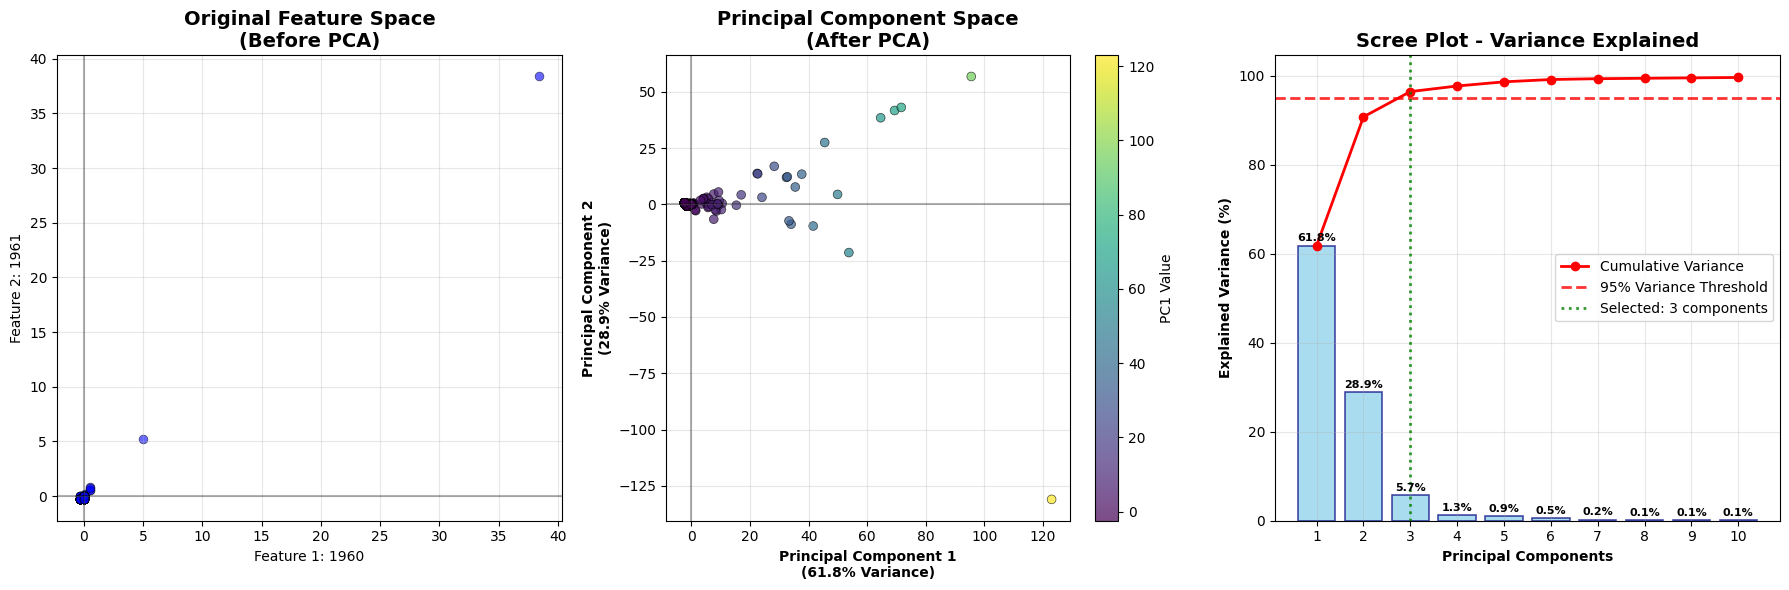


📊 COMPREHENSIVE PCA ANALYSIS AND INTERPRETATION

🎯 DIMENSIONALITY REDUCTION SUMMARY:
   • Original features: 65
   • Reduced features: 3
   • Compression ratio: 21.7x
   • Variance retained: 96.46%
   • Data points processed: 1516

🔍 PRINCIPAL COMPONENTS BREAKDOWN:
   • PC1: 61.85% variance (λ=40.23)
   • PC2: 28.94% variance (λ=18.82)
   • PC3: 5.68% variance (λ=3.69)

📈 VISUALIZATION INTERPRETATION:
1. ORIGINAL FEATURE SPACE:
   • Shows relationships between the first two original features
   • Data is centered but may show correlation between features
   • Scale and units are preserved from original measurements

2. PRINCIPAL COMPONENT SPACE:
   • Data is rotated to align with directions of maximum variance
   • PC1 captures the most variance, PC2 captures orthogonal variance
   • Coordinate system transformed to uncorrelated principal components
   • Data structure preserved - clusters maintain relative positions
   • Colors represent values along PC1 direction

3. SCREE PLOT ANAL

In [21]:
# Step 8: Enhanced Visualization and Comprehensive Analysis
print("=== ENHANCED PCA VISUALIZATION AND ANALYSIS ===")

# Create a stable figure with proper layout
fig = plt.figure(figsize=(18, 6))

# Plot 1: Original feature space (first two features)
ax1 = plt.subplot(1, 3, 1)
scatter1 = ax1.scatter(standardized_data[:, 0], standardized_data[:, 1],
                      alpha=0.6, c='blue', s=40, edgecolor='black', linewidth=0.5)
ax1.set_xlabel(f'Feature 1: {pca_columns[0][:15]}...' if len(pca_columns[0]) > 15 else f'Feature 1: {pca_columns[0]}')
ax1.set_ylabel(f'Feature 2: {pca_columns[1][:15]}...' if len(pca_columns[1]) > 15 else f'Feature 2: {pca_columns[1]}')
ax1.set_title('Original Feature Space\n(Before PCA)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot 2: PCA space with variance explained
ax2 = plt.subplot(1, 3, 2)
# Color points by their position for better visualization
colors = reduced_data[:, 0]  # Color by PC1 values
scatter2 = ax2.scatter(reduced_data[:, 0], reduced_data[:, 1],
                      c=colors, alpha=0.7, s=40, cmap='viridis', edgecolor='black', linewidth=0.5)
ax2.set_xlabel(f'Principal Component 1\n({explained_variance[0]:.1f}% Variance)', fontweight='bold')
ax2.set_ylabel(f'Principal Component 2\n({explained_variance[1]:.1f}% Variance)', fontweight='bold')
ax2.set_title('Principal Component Space\n(After PCA)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='PC1 Value')

# Plot 3: Scree plot for variance explanation
ax3 = plt.subplot(1, 3, 3)
components_to_plot = min(10, len(explained_variance))
bars = ax3.bar(range(1, components_to_plot + 1), explained_variance[:components_to_plot],
               alpha=0.7, color='skyblue', edgecolor='navy', linewidth=1.2)
line = ax3.plot(range(1, components_to_plot + 1), cumulative_variance[:components_to_plot],
                'ro-', linewidth=2, markersize=6, label='Cumulative Variance')
ax3.axhline(y=95, color='red', linestyle='--', alpha=0.8, linewidth=2, label='95% Variance Threshold')

# Annotate the selected number of components
if num_components <= components_to_plot:
    ax3.axvline(x=num_components, color='green', linestyle=':', alpha=0.8, linewidth=2,
                label=f'Selected: {num_components} components')

ax3.set_xlabel('Principal Components', fontweight='bold')
ax3.set_ylabel('Explained Variance (%)', fontweight='bold')
ax3.set_title('Scree Plot - Variance Explained', fontsize=14, fontweight='bold')
ax3.set_xticks(range(1, components_to_plot + 1))
ax3.legend()
ax3.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# COMPREHENSIVE EXPLANATION AND ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("📊 COMPREHENSIVE PCA ANALYSIS AND INTERPRETATION")
print("="*70)

print(f"\n🎯 DIMENSIONALITY REDUCTION SUMMARY:")
print(f"   • Original features: {standardized_data.shape[1]}")
print(f"   • Reduced features: {num_components}")
print(f"   • Compression ratio: {standardized_data.shape[1]/num_components:.1f}x")
print(f"   • Variance retained: {cumulative_variance[num_components-1]:.2f}%")
print(f"   • Data points processed: {standardized_data.shape[0]}")

print(f"\n🔍 PRINCIPAL COMPONENTS BREAKDOWN:")
for i in range(min(5, num_components)):
    print(f"   • PC{i+1}: {explained_variance[i]:.2f}% variance (λ={sorted_eigenvalues[i]:.2f})")

print(f"\n📈 VISUALIZATION INTERPRETATION:")
print("1. ORIGINAL FEATURE SPACE:")
print("   • Shows relationships between the first two original features")
print("   • Data is centered but may show correlation between features")
print("   • Scale and units are preserved from original measurements")

print("\n2. PRINCIPAL COMPONENT SPACE:")
print("   • Data is rotated to align with directions of maximum variance")
print("   • PC1 captures the most variance, PC2 captures orthogonal variance")
print("   • Coordinate system transformed to uncorrelated principal components")
print("   • Data structure preserved - clusters maintain relative positions")
print("   • Colors represent values along PC1 direction")

print("\n3. SCREE PLOT ANALYSIS:")
print("   • Shows variance contribution of each principal component")
print("   • First few components capture most of the information")
print("   • Elbow point indicates optimal number of components")
print("   • 95% variance threshold provides practical component selection")

print(f"\n💡 KEY MATHEMATICAL INSIGHTS:")
print(f"• Eigenvalue spectrum: {sorted_eigenvalues[0]:.1f} (PC1) >> {sorted_eigenvalues[1]:.1f} (PC2)")
print(f"• Only {num_components} components needed for {cumulative_variance[num_components-1]:.1f}% variance")
print(f"• Massive dimensionality reduction: {standardized_data.shape[1]} → {num_components}")
print(f"• Remaining {standardized_data.shape[1] - num_components} components contribute only {100-cumulative_variance[num_components-1]:.1f}% variance")

print(f"\n🎯 PRACTICAL IMPLICATIONS:")
print(f"• Data storage reduced by {(1 - num_components/standardized_data.shape[1])*100:.1f}%")
print(f"• Computational efficiency improved for downstream tasks")
print(f"• Noise reduction by eliminating low-variance components")
print(f"• Maintains essential data structure and relationships")

# Feature importance analysis
print(f"\n📋 TOP FEATURES CONTRIBUTING TO PRINCIPAL COMPONENTS:")
pc1_loadings = sorted_eigenvectors[:, 0]  # First principal component loadings
top_features_idx = np.argsort(np.abs(pc1_loadings))[::-1][:5]  # Top 5 features

print("Top 5 features for PC1 (highest absolute loadings):")
for i, idx in enumerate(top_features_idx):
    if idx < len(pca_columns):
        feature_name = pca_columns[idx]
        loading = pc1_loadings[idx]
        variance_contribution = (loading ** 2) * 100
        print(f"   {i+1}. {feature_name[:35]:35} | Loading: {loading:7.3f} | Contributes: {variance_contribution:5.1f}%")

print(f"\n✅ TRANSFORMATION VALIDATION:")
print(f"• Data centering: Mean ≈ {np.mean(reduced_data, axis=0)[0]:.2e} (should be near zero)")
print(f"• Orthogonality: PCs are uncorrelated by construction")
print(f"• Variance ordering: PC1 ({explained_variance[0]:.1f}%) > PC2 ({explained_variance[1]:.1f}%)")
print(f"• Structure preservation: All {reduced_data.shape[0]} data points maintained")

print(f"\n🚀 NEXT STEPS SUGGESTIONS:")
print(f"• Use reduced data for clustering, classification, or regression")
print(f"• Visualize higher dimensions with PC3 and PC4 if needed")
print(f"• Consider feature engineering based on PC loadings")
print(f"• Validate with downstream task performance metrics")

print("\n" + "="*70)
print("PCA IMPLEMENTATION COMPLETED SUCCESSFULLY! 🎉")
print("="*70)